# 1.	What is Tensorflow ? And how is Keras different from it?

Tensor flow is an opensource library created by google which is used for ML and deep learning programming. TF programs can be written using python and they are converted to C++ codes in the background

Keras is a highlevel neural network library built on top of tensorflow. Keras is userfriendly when compared to tensorflow. Performance of tensorflow is fatser when copared to keras.


# 2.	What are different types of models in Keras?  Explain the working of Sequential modeling.


Keras models are of two types

1. Sequential 

2. Functional


Sequental model uses linear stack of layers and the output from each layer is passed to the subsequent layer till the last layer



Model Creation:

> from keras.model import Sequential

> model = Sequential()

> There can be one input layer , multiple hidden layers , activation layers and droputs etc  one model.

>For a simple 3 layer model-

>Data will be passed to Dense layer of x number of neurons.If there are n inputs then n*x number of weights will be used for the dense layer.

>The output of the dense later will be passed to and activation function, which helps to address the non linearity of the data.  Result from activation function is passwed to the output layer which could be a softmax layer, which could be used for a multiclass classification.

>The output will be the probability of the result belonging to a particular class.

Training :

>The weights and bias at each layer is futher learned through back propagation, during the training phase of the model. The training will be done for a specific number of iterations known as epochs.

Evaluation:

The accuracy of the model is understood using the accuracy scores based on test dataset.

 



# 4.	MNIST has been the toy dataset for Deep Learning, but today you will need to design a Neural Network for the Fashion MNIST dataset (can be sourced from keras.datasets.fashion_mnist). 
a.	How many hidden layers are required for this dataset? 

b.	How many neurons per layer work best for the model, explain and generate insights across it.


In [ ]:
!pip install livelossplot

     |████████████████████████████████| 793 kB 9.8 MB/s 
     |████████████████████████████████| 381 kB 58.9 MB/s 
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Attempting uninstall: ipython
    Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.29 which is incompatible.
google-colab 1.0.0 requires ipython~=5.5.0, but you have ipython 7.33.0 which is incompatible.


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
import livelossplot
labels=['Top/T-shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
type(x_train)

numpy.ndarray

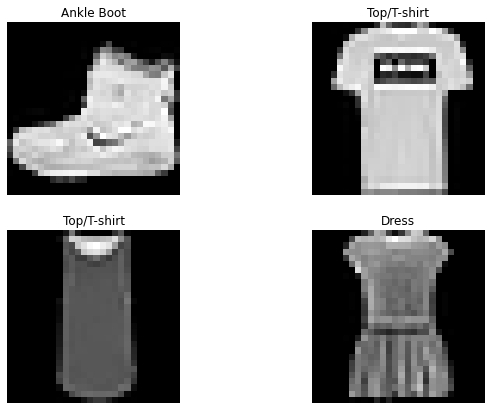

In [ ]:
fig = plt.figure(figsize=(10, 7))
rows = 2
columns = 2
fig.add_subplot(rows, columns, 1)
plt.axis('off')
plt.title(labels[y_train[0]])
plt.imshow(x_train[0],cmap='gray')

fig.add_subplot(rows, columns, 2)
plt.axis('off')
plt.title(labels[y_train[1]])
plt.imshow(x_train[1],cmap='gray')

fig.add_subplot(rows, columns, 3)
plt.axis('off')
plt.title(labels[y_train[2]])
plt.imshow(x_train[2],cmap='gray')

fig.add_subplot(rows, columns, 4)
plt.axis('off')
plt.title(labels[y_train[3]])
plt.imshow(x_train[3],cmap='gray')

In [ ]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [ ]:
def prep_data(x,y):
  x=x.reshape((x.shape[0], 28 * 28))
  out_x=x.astype('float32')/255
  out_y=keras.utils.to_categorical(y,10)
  print(out_y)
  return [out_x,out_y]

In [ ]:
x_train,y_train=prep_data(x_train,y_train)

[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
x_test,y_test=prep_data(x_test,y_test)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


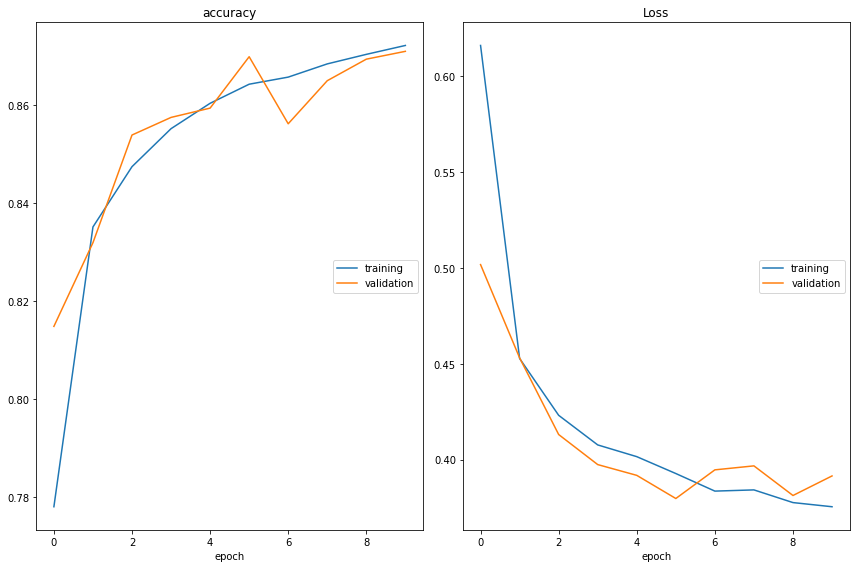

accuracy
	training         	 (min:    0.778, max:    0.872, cur:    0.872)
	validation       	 (min:    0.815, max:    0.871, cur:    0.871)
Loss
	training         	 (min:    0.375, max:    0.616, cur:    0.375)
	validation       	 (min:    0.380, max:    0.502, cur:    0.392)
469/469 [==============================] - 12s 25ms/step - loss: 0.3755 - accuracy: 0.8722 - val_loss: 0.3915 - val_accuracy: 0.8710
Test loss: 0.39153605699539185
Test accuracy: 0.8709999918937683


In [ ]:
BATCH_SIZE = 128
EPOCHS = 10
# Build neural network
plot_losses = livelossplot.PlotLossesKeras()
model = Sequential()
model.add(Dense(784, activation='relu', input_shape=(28 * 28,)))
model.add(Dropout(0.5))
model.add(Dense(392, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

# Compile model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
model.fit(x_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          callbacks=[plot_losses],
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


In [ ]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 784)               615440    
                                                                 
 dropout_24 (Dropout)        (None, 784)               0         
                                                                 
 dense_40 (Dense)            (None, 392)               307720    
                                                                 
 dropout_25 (Dropout)        (None, 392)               0         
                                                                 
 dense_41 (Dense)            (None, 10)                3930      
                                                                 
Total params: 927,090
Trainable params: 927,090
Non-trainable params: 0
_________________________________________________________________


# 5.	Explain your understanding of overfitting and underfitting in detail. How do you identify and measure overfitting? 

Overfitting is the case when the model performs well during training phase and the testing phase gives bad results.  When model is trained on high volume of data, it starts to learn from nosie and other inaccurate entries and will cause a model whose predictions with non training data will go wrong

Underfitting is the case when model is not correctly able to make sense of the underlying data. The models could not understand any patterns from the data. Underfitting usually happens when there is less data to traing with or the features in the model are not good. The data issue can be resolved by training the model with more data. Feature selection methods can be used to address the feature issue.


Overfitting can be identified using the accuracy sore or loss of the training and test data.  While the traing accuracy score continualy increases, the validation accuracy goes down, which is and indicator. 

# 6.	What is the use of batch size and why is it used in Deep Learning?

Batch size is the subset of the input data that is taken for one epoch. 

 

When batch size is large, the number of epoch will be less and the traing accuracy will be low as the number of passws will be less.  

In deep learning it is used to control the number if samples to learn from before the internal params are updated during the training phase in deep learning models.



# 7.	Using the above problem statement of Fashion MNIST build a NN with different batch sizes and report the accuracy metrics (acc, val acc, loss, val loss) in a sheet?

In [ ]:

def mymodel(BATCH_SIZE,x_train,y_train,x_test,y_test):
  EPOCHS=10
  model = Sequential()
  plot_losses = livelossplot.PlotLossesKeras()
  model.add(Dense(784, activation='relu', input_shape=(28 * 28,)))
  model.add(Dropout(0.5))
  model.add(Dense(392, activation='relu'))
  model.add(Dropout(0.25))
  model.add(Dense(10, activation='softmax'))

  # Compile model
  model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

  # Train model
  history = model.fit(x_train, y_train,
            batch_size=BATCH_SIZE,
            epochs=EPOCHS,
            callbacks=[plot_losses],
            verbose=1,
            validation_data=(x_test, y_test))

  return history


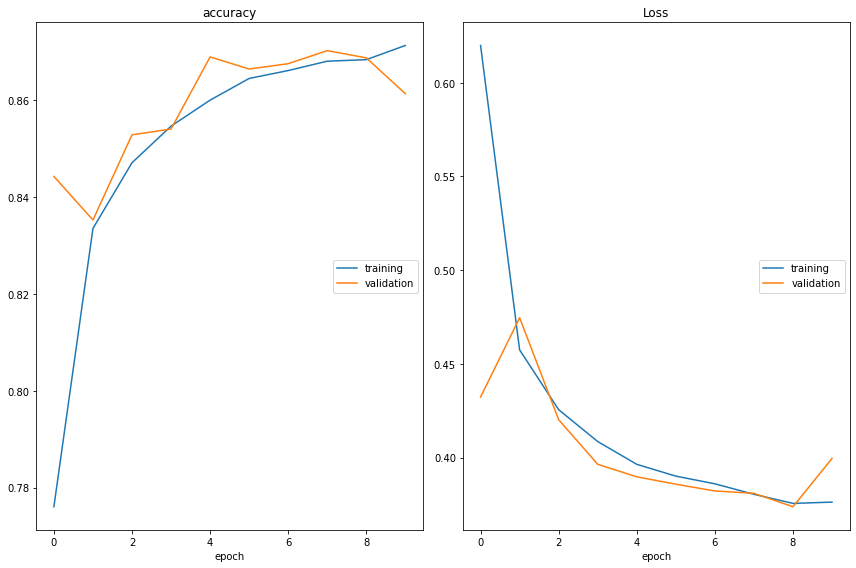

accuracy
	training         	 (min:    0.776, max:    0.871, cur:    0.871)
	validation       	 (min:    0.835, max:    0.870, cur:    0.861)
Loss
	training         	 (min:    0.376, max:    0.620, cur:    0.376)
	validation       	 (min:    0.374, max:    0.475, cur:    0.400)
469/469 [==============================] - 12s 25ms/step - loss: 0.3763 - accuracy: 0.8714 - val_loss: 0.3995 - val_accuracy: 0.8614


In [ ]:
history = mymodel(128,x_train,y_train,x_test,y_test)

In [ ]:
scores=[]

scores.append([128,history.history['accuracy'][-10],history.history['loss'][-1],history.history['val_accuracy'][-1],history.history['val_loss'][-1]])

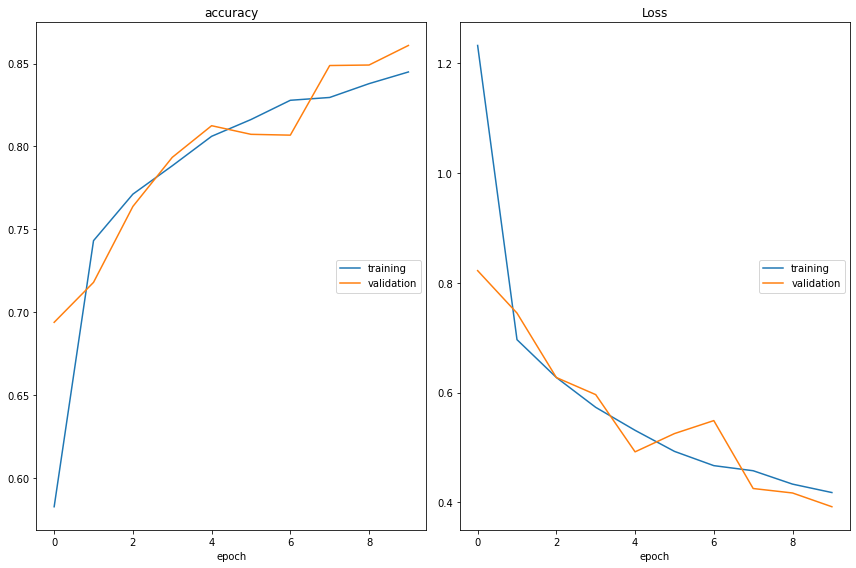

accuracy
	training         	 (min:    0.583, max:    0.845, cur:    0.845)
	validation       	 (min:    0.694, max:    0.861, cur:    0.861)
Loss
	training         	 (min:    0.418, max:    1.233, cur:    0.418)
	validation       	 (min:    0.392, max:    0.822, cur:    0.392)
20/20 [==============================] - 6s 316ms/step - loss: 0.4180 - accuracy: 0.8449 - val_loss: 0.3922 - val_accuracy: 0.8609


In [ ]:
history1 = mymodel(3000,x_train,y_train,x_test,y_test)

In [ ]:
scores.append([3000,history1.history['accuracy'][-1],history1.history['loss'][-1],history1.history['val_accuracy'][-1],history1.history['val_loss'][-1]])

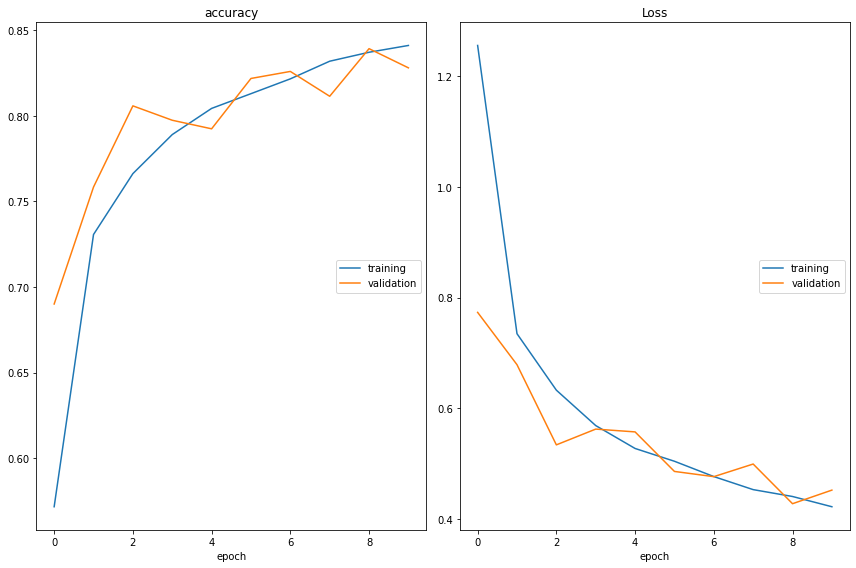

accuracy
	training         	 (min:    0.572, max:    0.841, cur:    0.841)
	validation       	 (min:    0.690, max:    0.839, cur:    0.828)
Loss
	training         	 (min:    0.422, max:    1.255, cur:    0.422)
	validation       	 (min:    0.428, max:    0.773, cur:    0.452)
20/20 [==============================] - 7s 339ms/step - loss: 0.4225 - accuracy: 0.8411 - val_loss: 0.4525 - val_accuracy: 0.8280


In [ ]:
history2 = mymodel(3000,x_train,y_train,x_test,y_test)

In [ ]:
scores.append([30000,history2.history['accuracy'][-1],history2.history['loss'][-1],history2.history['val_accuracy'][-1],history2.history['val_loss'][-1]])

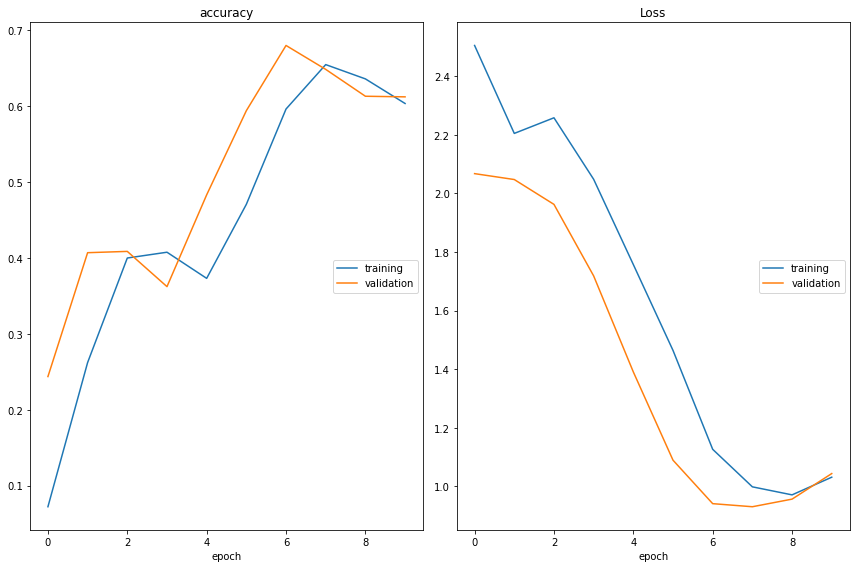

accuracy
	training         	 (min:    0.072, max:    0.655, cur:    0.603)
	validation       	 (min:    0.244, max:    0.680, cur:    0.612)
Loss
	training         	 (min:    0.971, max:    2.505, cur:    1.032)
	validation       	 (min:    0.931, max:    2.067, cur:    1.044)
1/1 [==============================] - 6s 6s/step - loss: 1.0316 - accuracy: 0.6035 - val_loss: 1.0440 - val_accuracy: 0.6122


In [ ]:
history3 = mymodel(60000,x_train,y_train,x_test,y_test)

In [ ]:
scores.append([60000,history3.history['accuracy'][-1],history3.history['loss'][-1],history3.history['val_accuracy'][-1],history3.history['val_loss'][-1]])

In [ ]:
from tabulate import tabulate

In [ ]:
print(tabulate(scores, headers=["Batch Size", "accuracy", "loss","val_accuracy","val_loss"]))

  Batch Size    accuracy      loss    val_accuracy    val_loss
------------  ----------  --------  --------------  ----------
         128    0.77605   0.376256          0.8614    0.399542
        3000    0.844917  0.418012          0.8609    0.392161
       30000    0.841067  0.422469          0.828     0.452458
       60000    0.60345   1.03161           0.6122    1.04399
